In [1]:
# Ocean Heat Budget Analyses in the Antarctica continental shelf (WAOM)

# Fabio B Dias - 4 May 2023
# Description:
#     this script get the heat transport across 1500m calculate for individual experiments:
# WAOM10: WAOM10extend_shflim_S_0.25Q_Cross-1500m-Transport.ipynb
# WAOM4: WAOM4extend_shflim_S_0.25Q_Cross-1500m-Transport.py
# WAOM4-NOTIDE: WAOM4extend_shflim_S_0.25Q_notides_Cross-1500m-Transport.py
# WAOM2:



In [2]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import gsw

import pyresample

from dask.distributed import Client

import warnings
warnings.filterwarnings('ignore')

In [3]:
tmp_files_dir = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'

In [4]:
# print(tmp_files_dir + expt + '_Tf_heat_transp_1500m')

In [16]:
# load ice draft to create masks
expt = 'WAOM10'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_transp_1500m')
Tf_heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_transp_1500m')
heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m')
temp_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m')
z_rho_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_10km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_10km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [17]:
expt = 'WAOM4'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_transp_1500m')
Tf_heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_transp_1500m')
heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m')
temp_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m')
z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_4km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_4km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [7]:
expt = 'WAOM4_notides'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_transp_1500m')
Tf_heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_transp_1500m')
heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m')
temp_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m')
z_rho_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m')
z_rho_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
# dist_along_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
# lon_along_4kmNT = ds.variables["one"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
# lat_along_4kmNT = ds.variables["two"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
# distance_indicesNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

In [8]:
print(len(heat_transport_4km[0,:]))

6919


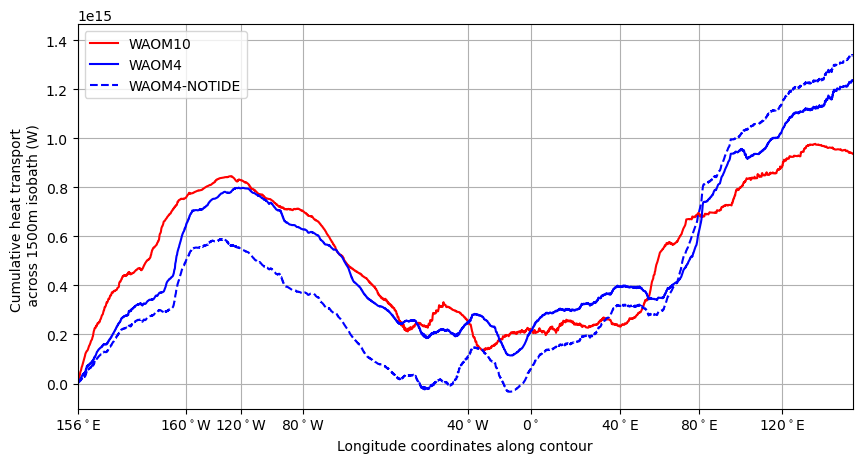

In [19]:
fig_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/'

# define along_contour axis with same length for both resolution:
along_4km = np.arange(0,len(heat_transport_4km[0,:]),1)
along_10km = np.arange(0,len(heat_transport_4km[0,:]),2.6734930448222567)

# some plots:
fig, ax = plt.subplots(nrows=1, figsize = (10, 5))
# plotting absolute value: Tf heat transport already subtracted during the calculation
# plt.plot(along_10km,(np.sum(np.cumsum(heat_transport_10km, axis=1),axis=0)), '-r', label='WAOM10')
plt.plot(dist_along_10km, (np.sum(np.cumsum(heat_transport_10km, axis=1),axis=0)), '-r', label='WAOM10') #'-k', label='Heat transport anomaly from $T_f$')
plt.plot(dist_along_4km,(np.sum(np.cumsum(heat_transport_4km, axis=1),axis=0)), '-b', label='WAOM4')
plt.plot(dist_along_4km,(np.sum(np.cumsum(heat_transport_4kmNT, axis=1),axis=0)), '--b', label='WAOM4-NOTIDE')

ax.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax.set_xlim(0, dist_along_10km[-1])

ax.set_xlabel('Longitude coordinates along contour')
ax.set_ylabel('Cumulative heat transport \n across 1500m isobath (W)');
plt.grid()
plt.legend()
name_fig='WAOM10x4x4NT_Cross-1500m_cumtransport_vint_raw.png'
plt.savefig(fig_path + name_fig, dpi=300)


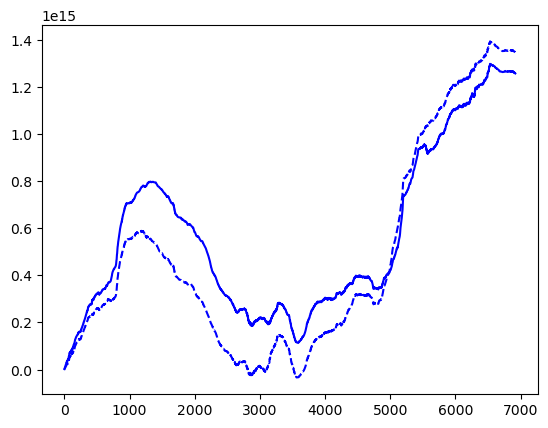

In [20]:
plt.plot(along_4km,(np.sum(np.cumsum(heat_transport_4km, axis=1),axis=0)), '-b', label='WAOM4')
plt.plot(along_4km,(np.sum(np.cumsum(heat_transport_4kmNT, axis=1),axis=0)), '--b', label='WAOM4-NOTIDE')


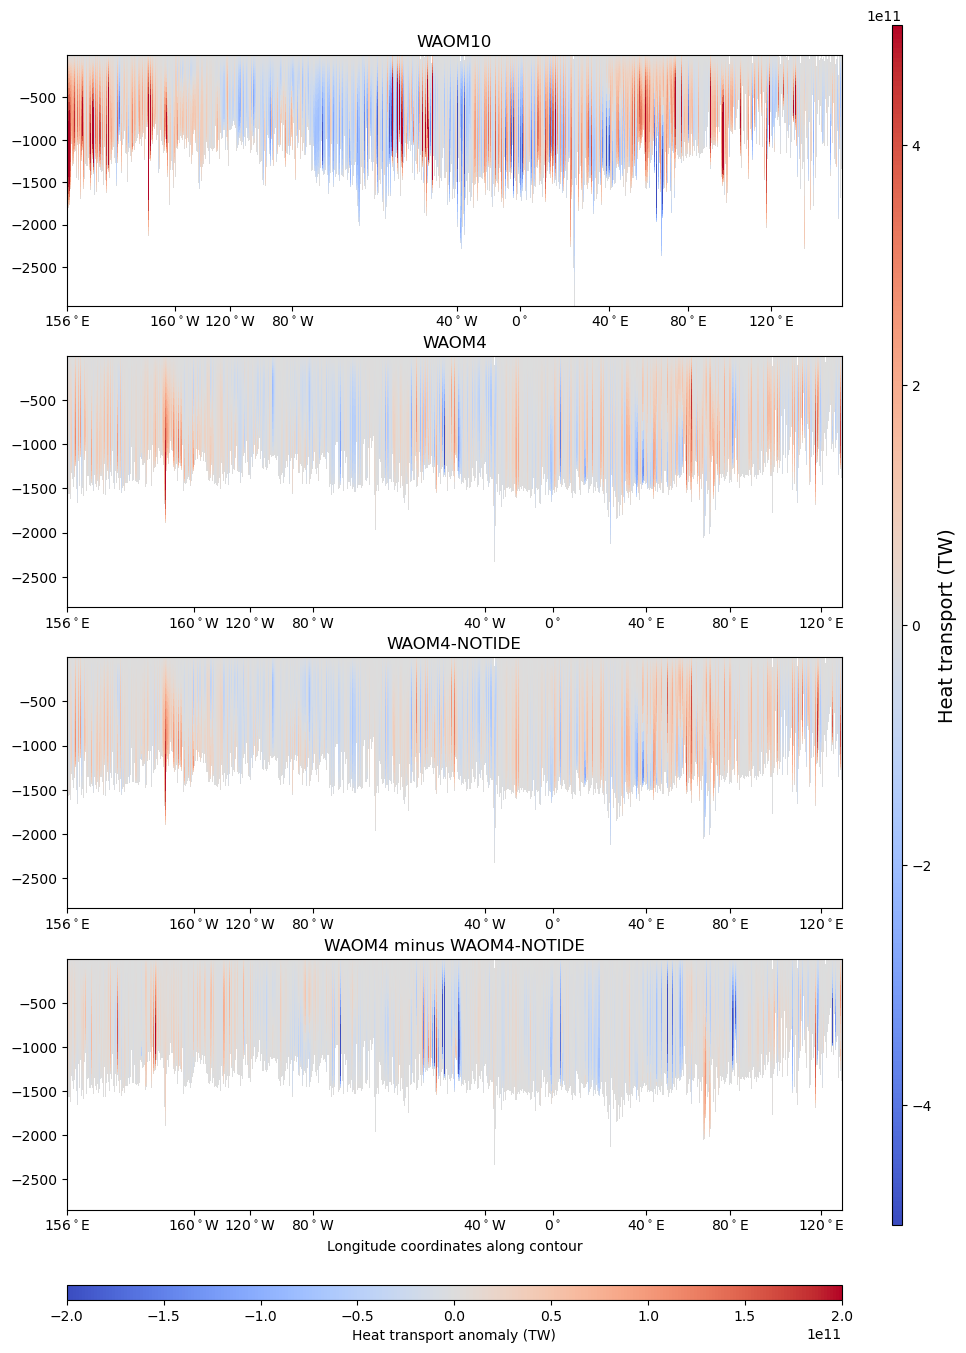

In [37]:

# define along_contour axis with same length for both resolution:
# along_4km = np.arange(0,len(heat_transport_4km[0,:]),1)
# along_10km = np.arange(0,len(heat_transport_4km[0,:]),2.6734930448222567)

[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))
[dist_along_axis_4km, Zaxis_4km] = np.meshgrid(dist_along_4km, np.arange(0,31))
[dist_along_axis_4km, Zaxis_4kmNT] = np.meshgrid(dist_along_4km, np.arange(0,31))

# define min/max for pcolor:
minHT = -5e11
maxHT = 5e11

fig, ax = plt.subplots(nrows=4, figsize = (10, 15))
# plotting absolute value: Tf heat transport already subtracted during the calculation
ht = ax[0].pcolormesh(dist_along_axis_10km, z_rho_10km, heat_transport_10km, cmap='coolwarm', vmin=minHT, vmax=maxHT)
ax[0].set_title('WAOM10')
ht = ax[1].pcolormesh(dist_along_axis_4km, z_rho_4km, heat_transport_4km, cmap='coolwarm', vmin=minHT, vmax=maxHT)
ax[1].set_title('WAOM4')
ht = ax[2].pcolormesh(dist_along_axis_4km, z_rho_4kmNT, heat_transport_4kmNT, cmap='coolwarm', vmin=minHT, vmax=maxHT)
ax[2].set_title('WAOM4-NOTIDE')
hta = ax[3].pcolormesh(dist_along_axis_4km, z_rho_4kmNT, heat_transport_4km-heat_transport_4kmNT, cmap='coolwarm', vmin=-2e11, vmax=2e11)
ax[3].set_title('WAOM4 minus WAOM4-NOTIDE')

# - setting all axis xticks the same with ax.flat:
# for aa in ax.flat:
#     aa.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     aa.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                           '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     aa.set_xlim(0, dist_along_10km[-1])
# - setting individual axis xticks:
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])

for aa in np.arange(1,4):
    ax[aa].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
    ax[aa].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                              '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[aa].set_xlim(0, dist_along_10km[-1])

ax[3].set_xlabel('Longitude coordinates along contour')

cax1 = plt.axes([0.95, 0.1, 0.01, 0.8])
cb = plt.colorbar(ht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (TW)', fontsize=14)

cax1 = plt.axes([0.125, 0.05, 0.775, 0.01])
cb = plt.colorbar(hta, cax=cax1, orientation='horizontal')
cb.ax.set_xlabel('Heat transport anomaly (TW)')

name_fig='WAOM10x4x4NT_Cross-1500m_transportXdepth.png'
plt.savefig(fig_path + name_fig, dpi=300)


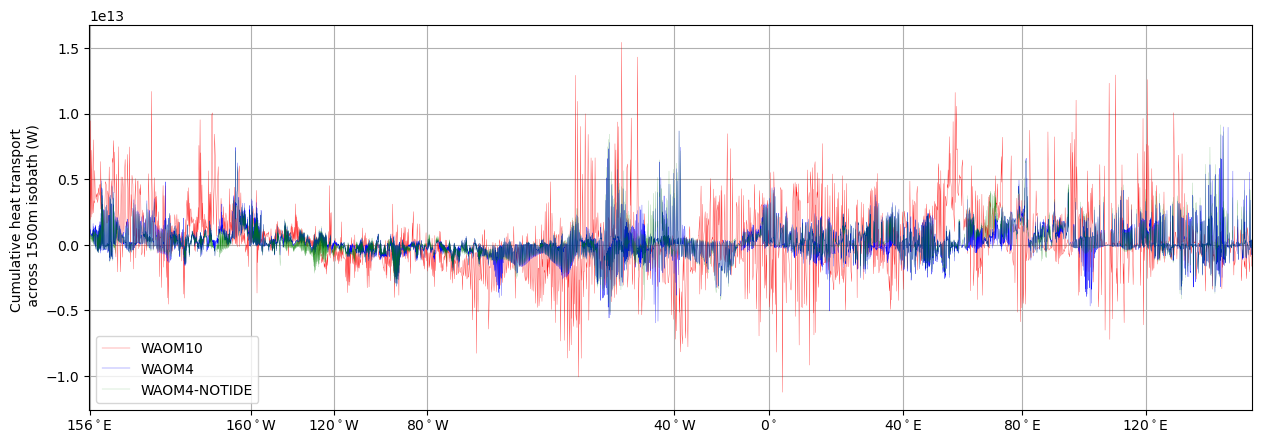

In [42]:

# some plots:
fig, ax = plt.subplots(nrows=1, figsize = (15, 5))
# plotting absolute value: Tf heat transport already subtracted during the calculation
plt.plot(dist_along_10km,(np.sum(heat_transport_10km, axis=0)), '-r', label='WAOM10',linewidth=0.2)
plt.plot(dist_along_4km,(np.sum(heat_transport_4km, axis=0)), '-b', label='WAOM4',linewidth=0.2)
plt.plot(dist_along_4km,(np.sum(heat_transport_4kmNT, axis=0)), '-g', label='WAOM4-NOTIDE',linewidth=0.1)

# - setting individual axis xticks:
ax.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax.set_xlim(0, dist_along_10km[-1])

# for aa in np.arange(1,4):
#     ax[aa].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[aa].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[aa].set_xlim(0, dist_along_4km[-1])

ax.set_ylabel('Cumulative heat transport \n across 1500m isobath (W)');
plt.grid()
plt.legend()
name_fig='WAOM10x4x4NT_Cross-1500m_cumtransport_vint_raw.png'
plt.savefig(fig_path + name_fig, dpi=300)
